In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Arc
from ipywidgets import *

orders = [2, 3]

generators = []
for order in orders:
    theta = np.pi / order
    generators += [np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])]

l = 2
C = np.array([[l, 0],
              [0, 1/l]])

A, B = generators

A = np.linalg.inv(C) @ A @ C
B = C @ B @ np.linalg.inv(C)

In [2]:
graph = {1 : [2, 3], 2 : [1], 3 : [1]} # 1 corresponds to A, 2 to B, and 3 to B^-1

In [3]:
def get_arc_params(interval):
    """map a pair of points in R^2 - {0} to a pair of circle angles"""
    x, y = rp1_to_s1(interval)
    return np.arctan2(y,x) * 180 / np.pi

def rp1_to_s1(v):
    """map a point in R^2 - {0} to S1 via the homeo RP1 -> S1"""
    x, y = v[0], v[1]

    return np.row_stack([
        2*x*y / (x*x + y*y),
        (x*x - y*y) / (x*x + y*y)
    ])

def rp1_interval(theta1, theta2):
    """get a pair of points in RP1 representing the pair of angles theta1, theta2
    note: theta1, theta2 parameterize the double cover of RP^1"""
    return np.array([
        [np.cos(theta1), np.cos(theta2)],
        [np.sin(theta1), np.sin(theta2)]
    ])

<IPython.core.display.Javascript object>


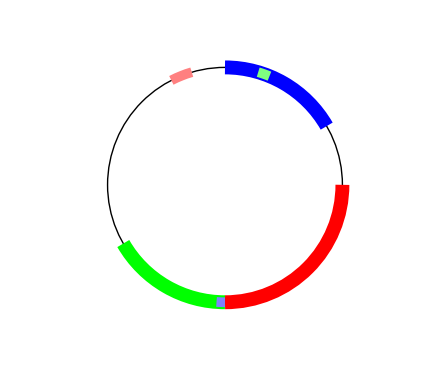

interactive(children=(FloatSlider(value=0.0, description='a1', max=3.141592653589793, step=0.02), FloatSlider(…

In [5]:
%matplotlib notebook

fig, ax = plt.subplots(figsize=(5, 5))

# RP1
rp1 = Circle((0,0), 1.0, fill=False)
ax.add_patch(rp1)

# Intervals
intervals = []
a1, b1 = 0, np.pi/6
theta2, theta1 = get_arc_params(rp1_interval(a1 % np.pi, b1 % np.pi))
intervals.append(Arc((0,0), 2., 2., theta1=theta1, theta2=theta2, color=np.array([0,0,1]), linewidth=10))

a2, b2 = np.pi/4, np.pi/2
theta2, theta1 = get_arc_params(rp1_interval(a2 % np.pi, b2 % np.pi))
intervals.append(Arc((0,0), 2., 2., theta1=theta1, theta2=theta2, color=np.array([1,0,0]), linewidth=10))

a3, b3 = np.pi/2, np.pi/1.5
theta2, theta1 = get_arc_params(rp1_interval(a3 % np.pi, b3 % np.pi))
intervals.append(Arc((0,0), 2., 2., theta1=theta1, theta2=theta2, color=np.array([0,1,0]), linewidth=10))

for arc in intervals:
    ax.add_patch(arc)

# Images
images = []
I = rp1_interval(a1 % np.pi, b1 % np.pi)
theta2, theta1 = get_arc_params(A @ I)
images.append(Arc((0,0), 2., 2., theta1=theta1, theta2=theta2, color=np.array([0.5,0.5,1]), linewidth=7))

I = rp1_interval(a2 % np.pi, b2 % np.pi)
theta2, theta1 = get_arc_params(B @ I)
images.append(Arc((0,0), 2., 2., theta1=theta1, theta2=theta2, color=np.array([1,0.5,0.5]), linewidth=7))

I = rp1_interval(a3 % np.pi, b3 % np.pi)
theta2, theta1 = get_arc_params(B @ B @ I)
images.append(Arc((0,0), 2., 2., theta1=theta1, theta2=theta2, color=np.array([0.5,1,0.5]), linewidth=7))

for arc in images:
    ax.add_patch(arc)
    
#plot data
ax.set_xlim((-1.2, 1.2))
ax.set_ylim((-1.2, 1.2))
ax.axis("off")
ax.set_aspect("equal")

@interact(a1 = (0, np.pi, 0.02), b1 = (0, np.pi, 0.02), a2 = (0, np.pi, 0.02), b2 = (0, np.pi, 0.02), 
          a3 = (0, np.pi, 0.02), b3 = (0, np.pi, 0.02))
def update(a1 = a1, b1 = b1, a2 = a2, b2 = b2, a3 = a3, b3 = b3):
    
    I = rp1_interval(a1 % np.pi, b1 % np.pi)
    intervals[0].theta2, intervals[0].theta1 = get_arc_params(I)
    images[0].theta2, images[0].theta1 = get_arc_params(A @ I)
    
    I = rp1_interval(a2 % np.pi, b2 % np.pi)
    intervals[1].theta2, intervals[1].theta1 = get_arc_params(I)
    images[1].theta2, images[1].theta1 = get_arc_params(B @ I)
    
    I = rp1_interval(a3 % np.pi, b3 % np.pi)
    intervals[2].theta2, intervals[2].theta1 = get_arc_params(I)
    images[2].theta2, images[2].theta1 = get_arc_params(B @ B @ I)
    
    fig.canvas.draw_idle()
